<a href="https://colab.research.google.com/github/LukaT11/quantitative_finance/blob/master/Monte%20Carlo%20Betting%20Simulations/Martingale_Betting_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Monte Carlo Simulation**
Monte carlo simulators are often used to assess the risk of a given trading strategy say with options or stocks.

Monte carlo simulators can help drive the point home that success and outcome is not the only measure of whether or not a choice was good or not. Choices should not be assesed after their outcome. Instead, the risks and benefits should only be considered at the time the decision was made, without hindsight bias. A monte carlo simulator can help one visualize most or all of the potential outcomes to have a much better idea regarding the risk of a decision.

In [0]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import numpy as np

Let's consider a basic example. Here, we will consider a gambling scenario, where a user can "roll" the metaphorical dice for an outcome of 1 to 100.

If the user rolls anything from 1-50, the "house" wins. If the user rolls anything from 51 to 99, the "user" wins. If the user rolls a 100, they lose.
With this, the house maintains a mere 1% edge, which is much smaller than the typical house edge, as well as the market edge when incorporating trading costs.

In [0]:
def rollDice():
    
    roll = random.randint(1,100)

    if roll == 100:
        #print (roll,' roll was 100, you lose. What are the odds?! Play again!')
        return False
        
    elif roll <= 50:
        #print (roll, ' roll was 1-50, you lose.')
        return False
    
    elif 100 > roll >= 51:
        #print (roll, ' roll was 51-99, you win! *pretty lights flash* (play more!')
        return True

## **Martingale**
is any of a class of betting strategies that originated from and were popular in 18th century France. The simplest of these strategies was designed for a game in which the gambler wins the stake if a coin comes up heads and loses it if the coin comes up tails. The strategy had the gambler double the bet after every loss, so that the first win would recover all previous losses plus win a profit equal to the original stake. The martingale strategy has been applied to roulette as well, as the probability of hitting either red or black is close to 50%.

Since a gambler with infinite wealth will, almost surely, eventually flip heads, the martingale betting strategy was seen as a sure thing by those who advocated it. None of the gamblers possessed infinite wealth, and the exponential growth of the bets would eventually bankrupt "unlucky" gamblers who chose to use the martingale. The gambler usually wins a small net reward, thus appearing to have a sound strategy. However, the gambler's expected value does indeed remain zero (or less than zero) because the small probability that the gambler will suffer a catastrophic loss exactly balances with the expected gain. (In a casino, the expected value is negative, due to the house's edge.) The likelihood of catastrophic loss may not even be very small. The bet size rises exponentially. This, combined with the fact that strings of consecutive losses actually occur more often than common intuition suggests, can bankrupt a gambler quickly.

In [0]:
def martingale(funds, initial_wager, wager_count):
    
    global doubler_busts
    global doubler_profits
    
    value = funds
    wager = initial_wager
    
    wX = []
    vY = []

    currentWager = 1
    
    previousWager = 'win'
    
    previousWagerAmmount = initial_wager
    
    while currentWager <= wager_count:
        if previousWager == 'win':
            #print ('we wont last wager, yay')
            if rollDice():
                value += wager
                #print (value)
                wX.append(currentWager)
                vY.append(value)
                
            else:
                value -= wager
                previousWager = 'loss'
                previousWagerAmmount = wager
                #print (value)
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    #print ('we went broker after, ',currentWager,' wagers')
                    doubler_busts += 1
                    break
                
        elif previousWager == 'loss':
            #print ('we lost the last one, so we will be super smart & double up!')
            if rollDice():
                wager = previousWagerAmmount * 2
                if (value - wager) < 0:
                    wager = value
                value += wager
                #print (value)
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
                
            else:
                wager = previousWagerAmmount * 2
                if (value - wager) < 0:
                    wager = value
                value -= wager
                #print(value)
                previousWagerAmmount = wager
                previousWager = 'loss'
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    #print ('we went broker after, ',currentWager,' wagers')
                    doubler_busts += 1
                    break
   
        currentWager += 1

    #print (value)
    plt.plot(wX,vY)
    
    if value > funds:
        doubler_profits += 1

## **Simulation**
Lets simulate 10.000 bettors, starting with 10.000USD, betting 100USD starting wager per hand and betting 10.000 times and graph the results

100%|██████████| 10000/10000 [01:30<00:00, 110.00it/s]


Doubler Bettor profit chance: 1.03
Doubler Bettor loss chance: 0.0
Doubler Bettor bust chance: 98.97


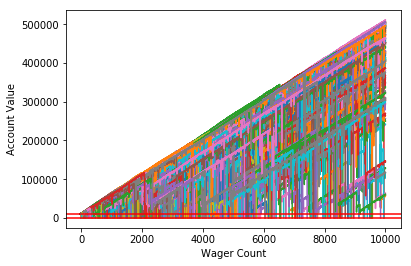

In [4]:
sample_size = 10000

startingFunds = 10000
wagerSize = 100
wagerCount = 10000

doubler_busts = 0.0
doubler_profits = 0.0

for i in tqdm(range(sample_size)):
    martingale(startingFunds,wagerSize,wagerCount)

print(f'Doubler Bettor profit chance: {(doubler_profits/sample_size) * 100}')
print(f'Doubler Bettor loss chance: {((sample_size - (doubler_profits + doubler_busts))/sample_size) * 100}')
print(f'Doubler Bettor bust chance: {(doubler_busts/sample_size) * 100}')
    
plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.axhline(0, color = 'r')
plt.axhline(startingFunds, color = 'r')
plt.show()